<a href="https://colab.research.google.com/github/2303A52224/AIML_2303A52224/blob/main/2303A52224_LAB_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rida Shireen

2303A52224

Batch-42

SET – 4 (Support Vector Machine (SVM)
1. Implement SVM with a linear kernel on a binary classification dataset.
2. Evaluate the model’s performance using accuracy and confusion matrix.
3. Visualize the decision boundary of the linear kernel SVM.
4. Use a non-linear kernel (e.g., RBF) and evaluate the model’s performance.
5. Compare the SVM model’s performance with and without feature scaling.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [21]:
# Step 1: Load your dataset (replace 'your_dataset.csv' with your actual file path)
# Replace 'your_dataset.csv' with the path to your dataset file
df = pd.read_csv('/content/weather_forecast_data.csv')

# Step 2: Explore the dataset (make sure 'target' is your binary target column)
print(df.head())  # Check the first few rows

# Step 3: Prepare the data - separate features (X) and labels (y)
# Check the actual column names in your DataFrame
print(df.columns)

# Replace 'target' with the actual name of your target column
# The following line is changed to get the actual target column name
target_column_name = df.columns[-1] # Assuming 'RainTomorrow' is the last column. Change -1 if needed.
#target_column_name = 'RainTomorrow' # Original line, commented out
X = df.drop(columns=target_column_name)  # Features
y = df[target_column_name]  # Labels

   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain
Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure',
       'Rain'],
      dtype='object')


In [23]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Implement and train the SVM with a linear kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Step 6: Evaluate the model using accuracy and confusion matrix
y_pred_linear = linear_svm.predict(X_test)

# Accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy of SVM with Linear Kernel: {accuracy_linear}")

Accuracy of SVM with Linear Kernel: 0.9333333333333333


Accuracy: 0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91        51
           1       0.86      0.98      0.91        49

    accuracy                           0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100


Confusion Matrix:
 [[43  8]
 [ 1 48]]


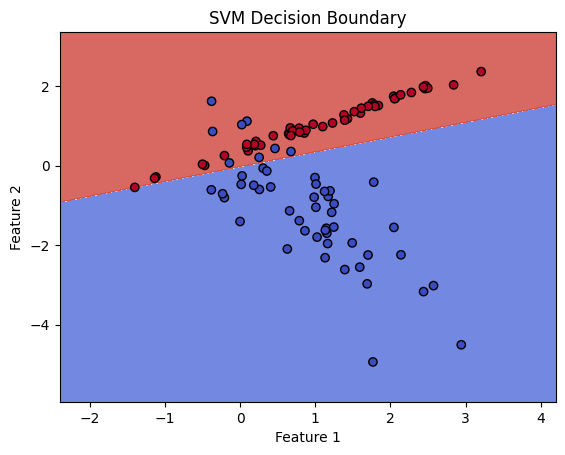

In [29]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X_test, y_test, svm_model)

Accuracy of SVM with RBF Kernel: 0.8826666666666667


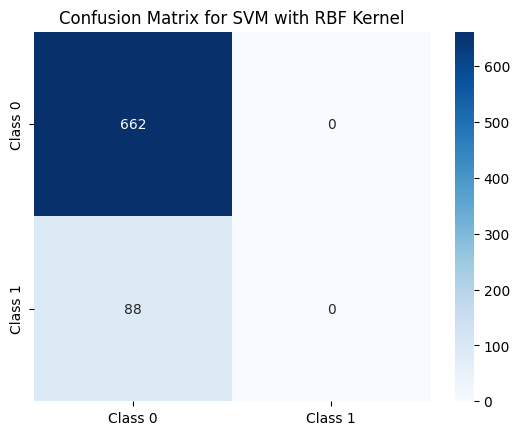

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Train the SVM model with RBF kernel
rbf_svm = SVC(kernel='rbf')  # Using the Radial Basis Function kernel
rbf_svm.fit(X_train, y_train)

# Step 8: Evaluate the model
y_pred_rbf = rbf_svm.predict(X_test)

# Accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy of SVM with RBF Kernel: {accuracy_rbf}")

# Confusion Matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for SVM with RBF Kernel')
plt.show()

Accuracy with feature scaling: 0.9293333333333333


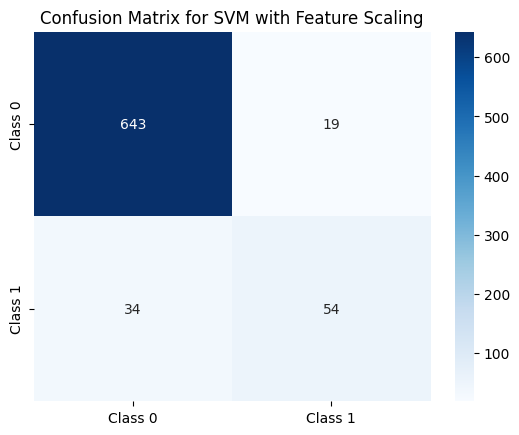


--- Comparison ---
Accuracy without scaling: 0.9333333333333333
Accuracy with scaling: 0.9293333333333333


In [17]:
# Step 9: Implement feature scaling and retrain the model

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Transform the test data

# Create and train the SVM model with scaled data
svm_with_scaling = SVC(kernel='linear')  # Initialize the SVM model
svm_with_scaling.fit(X_train_scaled, y_train)  # Train the model with scaled data

# Store the accuracy before scaling for comparison
accuracy_no_scaling = accuracy_linear  # Assuming 'accuracy_linear' from previous cell

# Step 8: Evaluate the model (accuracy and confusion matrix)
y_pred_with_scaling = svm_with_scaling.predict(X_test_scaled)

# Accuracy
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
print(f"Accuracy with feature scaling: {accuracy_with_scaling}")

# Confusion Matrix
cm_with_scaling = confusion_matrix(y_test, y_pred_with_scaling)
sns.heatmap(cm_with_scaling, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for SVM with Feature Scaling')
plt.show()

# Step 10: Compare the performance (Accuracy)
print("\n--- Comparison ---")
print(f"Accuracy without scaling: {accuracy_no_scaling}")
print(f"Accuracy with scaling: {accuracy_with_scaling}")